# **Swarm Robotics Competitions**

### 2021/2022      

## A. Pedro Aguiar
<pedro.aguiar@fe.up.pt>
<br>

<br> FEUP Oct. 2021

In [5]:
cd ~/catkin_ws/src/fast_turtle

/home/csr-g01/catkin_ws/src/fast_turtle


In [32]:
import sys
sys.path.append('/home/csr-g01/catkin_ws/devel/lib/python3/dist-packages') #em xx subsituir pelo id da equipa (01-10)
import rospy  
from geometry_msgs.msg import Twist
from nav_msgs.msg import Odometry
from fast_turtle.srv import ResetArena, ResetArena_obs
import math
import numpy as np
from dynamic_systems import Integrator
import ipywidgets as wd

In [7]:
team = '1' #change according to your team id

In [8]:
rospy.wait_for_service('/reset_arena')
reset_arena = rospy.ServiceProxy('/reset_arena', ResetArena)

### Correr a célula abaixo para dar reset à arena!

In [9]:
try:
    reset_arena()
except rospy.ServiceException as e:
    print("Service call failed: %s" + str(e))            

In [10]:
rospy.init_node('example' + team, anonymous=True)

In [11]:
pub0 = rospy.Publisher('/cmd_vel_sd0' + team, Twist, queue_size=10)



Consider now an agent in the plane $(x,y)$ with single integrator dynamics in each axis, that is,

$$ 
\begin{align}
\dot x = u_x \\
\dot y = u_y 
\end{align}
$$


In [17]:
dt = 0.1
sim_time = 10
time = []
ux, uy = [], []
x, y = [], []
statex, statey = [], []
t = 0.0

rospy.sleep(0.1)
run = True

if run: 
    
    #for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):
    for t in np.linspace(0.0, sim_time, num=int(sim_time/dt),endpoint=False):

        #print ("time t", t)
        # Time
        time.append(t)
        # Control
        msg = rospy.wait_for_message('/odom0' + team, Odometry, timeout=None)
        statex = msg.pose.pose.position.x
        statey = msg.pose.pose.position.y
        print("statex:",statex)
        print("statey:",statey)
        # Control
        if t<0.5:
         u_control = [0.0, 1.0]
        else:
         u_control = [0.0, 0.0]


        # Send actuation commands
        msg = Twist()
        msg.linear.x = u_control[0]
        msg.linear.y = u_control[1]
        pub0.publish(msg)
        #rospy.loginfo(msg_act)
        ux.append(u_control[0])
        uy.append(u_control[1])
        x.append(statex)
        y.append(statey)

        #rospy.loginfo(msg.pose.pose.position.x)
    run = false
    
msg = Twist()
msg.linear.x = 0.0
msg.linear.y = 0.0
pub0.publish(msg)
#sub.unregister()

time t 0.0
statex: 0.0
statey: 0.0
time t 0.1
statex: 0.0
statey: 0.0
time t 0.2
statex: 0.0
statey: 0.1
time t 0.30000000000000004
statex: 0.0
statey: 0.2
time t 0.4
statex: 0.0
statey: 0.30000000000000004
time t 0.5
statex: 0.0
statey: 0.4
time t 0.6000000000000001
statex: 0.0
statey: 0.5
time t 0.7000000000000001
statex: 0.0
statey: 0.5
time t 0.8
statex: 0.0
statey: 0.5
time t 0.9
statex: 0.0
statey: 0.5
time t 1.0
statex: 0.0
statey: 0.5
time t 1.1
statex: 0.0
statey: 0.5
time t 1.2000000000000002
statex: 0.0
statey: 0.5
time t 1.3
statex: 0.0
statey: 0.5
time t 1.4000000000000001
statex: 0.0
statey: 0.5
time t 1.5
statex: 0.0
statey: 0.5
time t 1.6
statex: 0.0
statey: 0.5
time t 1.7000000000000002
statex: 0.0
statey: 0.5
time t 1.8
statex: 0.0
statey: 0.5
time t 1.9000000000000001
statex: 0.0
statey: 0.5
time t 2.0
statex: 0.0
statey: 0.5
time t 2.1
statex: 0.0
statey: 0.5
time t 2.2
statex: 0.0
statey: 0.5
time t 2.3000000000000003
statex: 0.0
statey: 0.5
time t 2.40000000000000

NameError: name 'false' is not defined

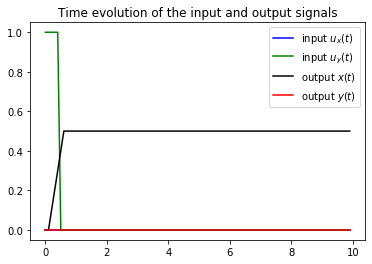

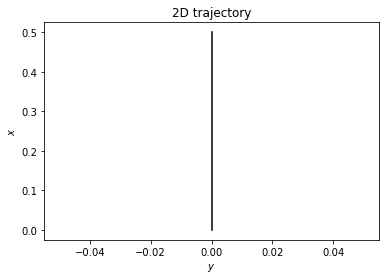

In [18]:
# Plot commands

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(time, ux, label='input $u_x(t)$', color='b')
plt.plot(time, uy, label='input $u_y(t)$', color='g')
plt.plot(time, y, label='output $x(t)$', color='k')
plt.plot(time, x, label='output $y(t)$', color='r')

#plt.xlabel('time $t$ [s]');
plt.legend()
#plt.grid()
plt.title('Time evolution of the input and output signals');

plt.figure()
plt.plot(x, y, label='$x(t), y(t)$', color='k')
plt.xlabel('$y$');
plt.ylabel('$x$');
plt.title('2D trajectory');

### Correr a célula abaixo para dar reset à arena!

In [36]:
try:
    reset_arena()
except rospy.ServiceException as e:
    print("Service call failed: %s" + str(e))            

**Activity 2.** Go above and try with different initial conditions of the state $x(0)$ and different input signals $u(t)$.


### Tracking a desired reference signal


To track in closed-loop a desired reference signal $x_d(t)$, a simple (but very efficient) feedback controller is this one: 

$$
u = - k \tilde x + \dot x_d
$$

where $k$ is a positive gain, and $\tilde x(t) = x(t)-x_d(t)$ is the tracking error.


Note that in closed-loop the tracking error satisfies:

$$
\dot {\tilde x} = - k \tilde x \,, \quad k>0
$$



Let's now check this in simulation for a desired sinusoidal signal $x_d(t) = sin (t)$

In [34]:
# Dynamics: States=[x] Control=[u] where x_dot=u
initial_state = [1.0]
initial_control = [0.0]
#robot = Integrator(initial_state, initial_control)

dt = 0.1
sim_time = 10
time = []
u = []
x = []
xdv = []

k=2   # Gain of the controller
run = True

if run: 
    for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

        # Time
        time.append(t)
        xd = math.sin(t)
        dot_xd=math.cos(t)

        # Control
        msg = rospy.wait_for_message('/odom0' + team, Odometry, timeout=None)
        state = msg.pose.pose.position.x
        u_control = (-k*(state-xd)+dot_xd)


        # Send actuation commands
        msg_act = Twist()
        msg_act.linear.x = u_control
        pub0.publish(msg_act)
        u.append(u_control)
        x.append(state)
        xdv.append(xd)


        #rospy.loginfo(msg.pose.pose.position.x)
    run = False

msg = Twist()
msg.linear.x = 0.0
msg.linear.y = 0.0
pub0.publish(msg)

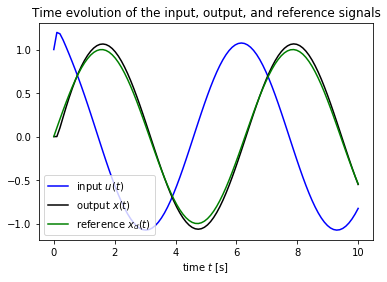

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot commands
plt.figure()
plt.plot(time, u, label='input $u(t)$', color='b')
plt.plot(time, x, label='output $x(t)$', color='k')
plt.plot(time, xdv, label='reference $x_d(t)$', color='g')

plt.xlabel('time $t$ [s]');
plt.legend()
#plt.grid()
plt.title('Time evolution of the input, output, and reference signals');




### Correr a célula abaixo para dar reset à arena!

In [36]:
try:
    reset_arena()
except rospy.ServiceException as e:
    print("Service call failed: %s" + str(e))            

**Activity 3.** Go above and try:

1.   Other (positive) values for the gain $k$
2.   Different initial conditions $x(0)$
3. Different reference signals $x_d(t)$


**Tracking in 2D:** As before, consider now the agent in the plane $(x,y)$ with single integrator dynamics:

$$ 
\begin{align}
\dot \xi = u
\end{align}
$$

where 
$$
\xi = 
\begin{bmatrix} 
x \\
y
\end{bmatrix} \,, \quad
u = 
\begin{bmatrix} 
u_x \\
u_y 
\end{bmatrix}
$$

are the 2D state and 2D control, respectively.

Similarly, the feedback controller is now given by

$$
u = - K \tilde \xi + \dot \xi_d
$$

where $K$ is a $2\times 2$ positive-definite matrix gain, and

$$
\tilde \xi(t) = 
\xi - \xi_d \,, \quad
\xi_d(t) = 
\begin{bmatrix}
x_d(t) \\
y_d(t)
\end{bmatrix}
$$ 

is the 2D tracking error and desired reference signal, respectively.

Note that in closed-loop the tracking error satisfies:

$$
\dot {\tilde \xi} + K \tilde \xi = 0 \,, \quad K > 0
$$


Let's now check this in simulation for tracking a plane circle centered at the origin with radius 1, that is, 

$$
\xi_d(t) = 
\begin{bmatrix}
\sin(t) \\
\cos(t)
\end{bmatrix}
$$

In [20]:
# Dynamics: States=[x] Control=[u] where x_dot=u

dt = 0.1
sim_time = 10
time = []
ux, uy = [], []
x, y = [], []
xdv, ydv = [], []

# Gain matrix
kx, ky = 10, 1
K = np.diag([kx,ky])

run = True

if run:
    
    for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

        # Time
        time.append(t)

        # Reference signals
        xid = np.array([ math.sin(t), math.cos(t)])
        dot_xid = np.array([ math.cos(t), -math.sin(t) ])

        # Control
        msg = rospy.wait_for_message('/odom0' + team, Odometry, timeout=None)

        state = [msg.pose.pose.position.x, msg.pose.pose.position.y]

        u_control = (- K @ ( state - xid ) + dot_xid)

        # Send actuation commands
        msg_act = Twist()
        msg_act.linear.x = u_control[0]
        msg_act.linear.y = u_control[1]
        pub0.publish(msg_act)

        #rospy.loginfo(msg_act.linear)

        ux.append(u_control[0])
        uy.append(u_control[1])

        x.append(state[0])
        y.append(state[1])

        xdv.append(xid[0])
        ydv.append(xid[1])
    run = False

msg = Twist()
msg.linear.x = 0.0
msg.linear.y = 0.0
pub0.publish(msg)

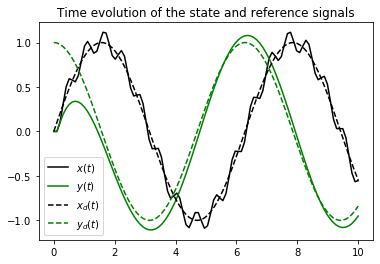

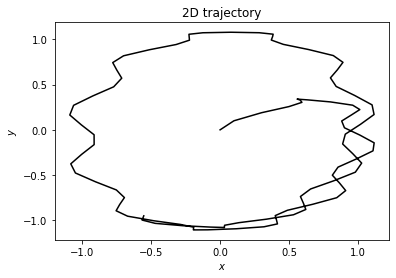

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(time, x, label='$x(t)$', color='k')
plt.plot(time, y, label='$y(t)$', color='g')
plt.plot(time, xdv, label='$x_d(t)$', color='k', linestyle='dashed')
plt.plot(time, ydv, label='$y_d(t)$', color='g', linestyle='dashed')

#plt.xlabel('time $t$ [s]');
plt.legend()
#plt.grid()
plt.title('Time evolution of the state and reference signals');

plt.figure()
plt.plot(x, y, label='$x(t), y(t)$', color='k')
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.title('2D trajectory');

### Correr a célula abaixo para dar reset à arena!

In [22]:
try:
    reset_arena()
except rospy.ServiceException as e:
    print("Service call failed: %s" + str(e))            

**Activity 4.** Go above and try:

1. Other values for the gain $K$
2. Different initial conditions $\xi(0)$
3. Different reference signals $\xi_d(t)$


### What happens when there is noise in the sensor?


Suppose now that we cannot get exactly the state $\xi(t)$ , but just an estimate $\hat \xi(t)$ that can be viewed as a sum of two terms of the form

$$
\hat \xi(t) = \xi(t) + w(t)
$$

where $\xi(t)$ is the true state, and $w(t)$ is an unknown disturbance (e.g., noise) signal.

Assume that the noise signal has a Gaussian distribution, that is,  $w(t) = \mathcal{N}(b, \sigma)$ with a mean (bias) $b$ and standard deviation $\sigma$. 

**Go to a desired point (open-loop):** Assume we want to steer the agent towards a fixed goal point $\xi_d = (x_d, y_d)$.

First, let's consider the naive open-loop case. One option is to move with a constant speed along the direction of the goal point while it is not close to the goal, that is, set the control signal as 

$$
u =
\begin{cases}
v \frac{\xi_d- \hat \xi(0)}{||\xi_d- \hat \xi(0)||} \,,& \quad ||\xi_d- \hat \xi(t)|| \ge \epsilon \\
0 \,,& \quad ||\xi_d- \hat \xi(t)|| < \epsilon
\end{cases}
$$

where $v$ is some constant speed.


In [23]:
msg = rospy.wait_for_message('/odom0' + team, Odometry, timeout=None)
   
# Dynamics: States=[x] Control=[u] where x_dot=u
initial_state = [msg.pose.pose.position.x, msg.pose.pose.position.y]
initial_control = [0.0, 0.0]

dt = 0.1
sim_time = 10
time = []
ux, uy = [], []
x, y = [], []
est_x, est_y = [], []
xdv, ydv = [], []

epsilon = 0.5
vel = 0.5
run = True

if run:
    for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

        # Time
        time.append(t)
        xid = np.array([ 2.0, -2.0 ])
        dot_xid = np.array([ 0.0, 0.0 ])

        # noise
        noise_bias = 0.2
        noise_std_deviation = 0.005
        noise = np.random.normal(noise_bias,noise_std_deviation,2)

        est_initial_state = initial_state + noise
        msg = rospy.wait_for_message('/odom0' + team, Odometry, timeout=None)
        state = [msg.pose.pose.position.x,msg.pose.pose.position.y]
        est_state = state + noise

        # control
        distance = np.linalg.norm(est_state - xid)
        if distance >= epsilon:
            u_control = - vel*(est_initial_state - xid )/np.linalg.norm(est_initial_state - xid)
        else:
            u_control = np.zeros(2)

        # Send actuation commands
        msg_act = Twist()
        msg_act.linear.x = u_control[0]
        msg_act.linear.y = u_control[1]
        pub0.publish(msg_act)

        ux.append(u_control[0])
        uy.append(u_control[1])

        x.append(state[0])
        y.append(state[1])

        est_x.append(est_state[0])
        est_y.append(est_state[1])

        xdv.append(xid[0])
        ydv.append(xid[1])
    run = False
    
msg = Twist()
msg.linear.x = 0.0
msg.linear.y = 0.0
pub0.publish(msg)

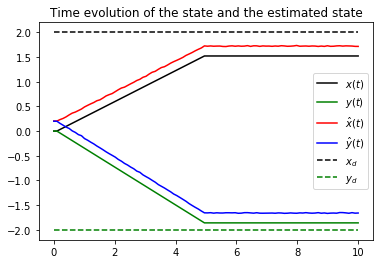

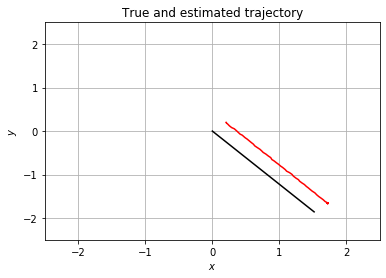

In [24]:
%matplotlib inline
plt.figure()
plt.plot(time, x, label='$x(t)$', color='k')
plt.plot(time, y, label='$y(t)$', color='g')
plt.plot(time, est_x, label='$\hat x(t)$', color='r')
plt.plot(time, est_y, label='$\hat y(t)$', color='b')
plt.plot(time, xdv, label='$x_d$', color='k', linestyle='dashed')
plt.plot(time, ydv, label='$y_d$', color='g', linestyle='dashed')

#plt.xlabel('time $t$ [s]');
plt.legend()
#plt.grid()
plt.title('Time evolution of the state and the estimated state');

plt.figure()
plt.plot(x, y, label='$x(t), y(t)$', color='k')
plt.plot(est_x, est_y, label='$x(t), y(t)$', color='r')
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.grid()
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.title('True and estimated trajectory');

### Correr a célula abaixo para dar reset à arena!

In [27]:
try:
    reset_arena()
except rospy.ServiceException as e:
    print("Service call failed: %s" + str(e))            

**Activity 5.** Go above and try:

1. Other position goals $\xi_d$
2. Different initial conditions $\xi(0)$
3. Different bias $b$, standard deviation $\sigma$ for the noise, and different threshold $\epsilon$

**Go to a desired point (closed-loop):** 
Now, let's check how this noise affects the performance of the closed-loop system, with our tracking controller given by

$$
u = - K \tilde \xi + \dot{\xi}_d
$$

where now $\dot{\xi}_d =0$

In [28]:
msg = rospy.wait_for_message('/odom0' + team, Odometry, timeout=None)
   
# Dynamics: States=[x] Control=[u] where x_dot=u
initial_state = [msg.pose.pose.position.x, msg.pose.pose.position.y]
initial_control = [0.0, 0.0]

dt = 0.1
sim_time = 10
time = []
ux, uy = [], []
x, y = [], []
est_x, est_y = [], []
xdv, ydv = [], []

#Gain 
kx, ky = 1, 1
K = np.diag([kx,ky])

run = True

if run:
    
    for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

        # Time
        time.append(t)
        xid = np.array([ 2.0, -2.0 ])
        dot_xid = np.array([ 0.0, 0.0 ])

        # noise
        noise_bias = 0.2
        noise_std_deviation = 0.005
        noise = np.random.normal(noise_bias,noise_std_deviation,2)

        #control
        est_initial_state = initial_state + noise

        msg = rospy.wait_for_message('/odom0' + team, Odometry, timeout=None)
        state = [msg.pose.pose.position.x, msg.pose.pose.position.y]
        est_state = state + noise

        u_control = - K @ ( est_state - xid ) + dot_xid

        # Send actuation commands
        msg_act = Twist()
        msg_act.linear.x = u_control[0]
        msg_act.linear.y = u_control[1]
        pub0.publish(msg_act)

        ux.append(u_control[0])
        uy.append(u_control[1])

        x.append(state[0])
        y.append(state[1])

        est_x.append(est_state[0])
        est_y.append(est_state[1])

        xdv.append(xid[0])
        ydv.append(xid[1])
    
    run = False

msg = Twist()
msg.linear.x = 0.0
msg.linear.y = 0.0
pub0.publish(msg)

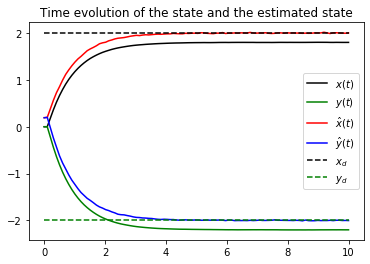

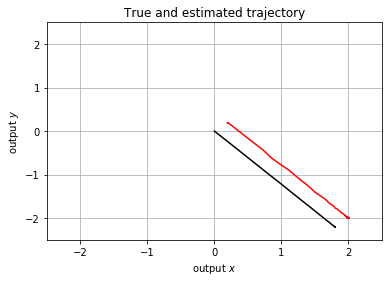

In [29]:
plt.figure()
plt.plot(time, x, label='$x(t)$', color='k')
plt.plot(time, y, label='$y(t)$', color='g')
plt.plot(time, est_x, label='$\hat x(t)$', color='r')
plt.plot(time, est_y, label='$\hat y(t)$', color='b')
plt.plot(time, xdv, label='$x_d$', color='k', linestyle='dashed')
plt.plot(time, ydv, label='$y_d$', color='g', linestyle='dashed')

#plt.xlabel('time $t$ [s]');
plt.legend()
#plt.grid()
plt.title('Time evolution of the state and the estimated state');

plt.figure()
plt.plot(x, y, label='$x(t), y(t)$', color='k')
plt.plot(est_x, est_y, label='$x(t), y(t)$', color='r')
plt.xlabel('output $x$');
plt.ylabel('output $y$');
plt.grid()
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.title('True and estimated trajectory');

### Correr a célula abaixo para dar reset à arena!

In [30]:
try:
    reset_arena()
except rospy.ServiceException as e:
    print("Service call failed: %s" + str(e))            

**Activity 6.** Go above and try:

1. Other position goals $\xi_d$
2. Different initial conditions $\xi(0)$
3. Different bias $b$, standard deviation $\sigma$ for the noise, and different gain $K$

### How to avoid an obstacle?

Let's now assume that there is a circular shaped obstacle (green) centered at  [1.0, 1.0] with radius $r=0.5\,m$ between the robot initial position (black) at the origin  [0.0, 0.0]  and the desired goal (blue) at  [1.5, 2.0].

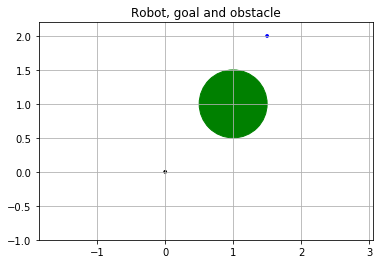

In [31]:
circle = plt.Circle((1.0, 1.0), 0.5, color='g', label='obstacle')
robot = plt.Circle((0.0, 0.0), 0.02, color='k', label='$x(t)$')
goal = plt.Circle((1.5, 2.0), 0.02, color='b', label='$x(t)$')

fig, ax = plt.subplots()

ax.axis('equal')
plt.xlim(-1,2.2)
plt.ylim(-1,2.2)
plt.grid()
plt.title('Robot, goal and obstacle');

ax.add_patch(circle);
ax.add_patch(robot);
ax.add_patch(goal);

# Nota: No rvizweb, fazer um novo load config com o setup da simulação 

In [33]:
rospy.wait_for_service('/reset_arena_obs')
reset_arena_obs = rospy.ServiceProxy('/reset_arena_obs', ResetArena_obs)

In [34]:
pub0_obs = rospy.Publisher('/cmd_vel_sd0_obs' + team, Twist, queue_size=10)

In [35]:
try:
    reset_arena_obs()
except rospy.ServiceException as e:
    print("Service call failed: %s" + str(e))            

We propose a small modification on the previous controller by introducing an extra *repulsive term* as follows:

$$
u = - K \tilde \xi + \frac{k_o}{d^2} ( \xi - \xi_o ) + \dot{\xi}_d \,, \quad d = ||\xi - \xi_o ||-r
$$

where $k_o$ is a positive gain, and $\xi_o = [1.0, 1.0]$ and $r$ are the center position of the obstacle and radius, respectively. Notice how $d$ is the distance between the robot position and the obstacle boundary.

Note that the new term can be interpreted as a repulsive field around the obstacle, as shown by the simulations below.

First, we consider the case were $k_o$ is a constant.

In [36]:
msg = rospy.wait_for_message('/odom0_obs' + team, Odometry, timeout=None)
   
# Dynamics: States=[x] Control=[u] where x_dot=u
initial_state = [msg.pose.pose.position.x, msg.pose.pose.position.y]
initial_control = [0.0, 0.0]

dt = 0.01
sim_time = 10
time = []
ux, uy = [], []
x, y = [], []
xdv, ydv = [], []

#Gain
kx, ky = 1, 1
K = np.diag([kx,ky])

Ko = 0.1*K
xo = np.array([ 1.0, 1.0 ])
radius = 0.5

run = True
if run:
    for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

        # Time
        time.append(t)
        xid = np.array([ 1.5, 2.0 ])
        dot_xid = np.array([ 0.0, 0.0 ])

        # Control
        noise_bias = 0.0
        noise_std_deviation = 0.0
        msg = rospy.wait_for_message('/odom0_obs' + team, Odometry, timeout=None)
        state = [msg.pose.pose.position.x, msg.pose.pose.position.y] + np.random.normal(noise_bias,noise_std_deviation,2)

        distance = np.linalg.norm(state - xo) - radius    
        u_control = - K @ ( state - xid ) + (1/distance**2)*Ko @ ( state - xo ) + dot_xid

        # Send actuation commands
        msg_act = Twist()
        msg_act.linear.x = u_control[0]
        msg_act.linear.y = u_control[1]
        pub0_obs.publish(msg_act)

        ux.append(u_control[0])
        uy.append(u_control[1])

        x.append(state[0])
        y.append(state[1])

        xdv.append(xid[0])
        ydv.append(xid[1])
    run = False
    
msg = Twist()
msg.linear.x = 0.0
msg.linear.y = 0.0
pub0.publish(msg)

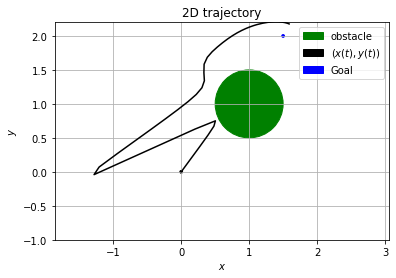

In [37]:
circle = plt.Circle((1.0, 1.0), 0.5, color='g', label='obstacle')
robot = plt.Circle((0.0, 0.0), 0.02, color='k', label='$(x(t),y(t))$')
goal = plt.Circle((1.5, 2.0), 0.02, color='b', label='Goal')

fig, ax = plt.subplots()

ax.axis('equal')
plt.xlim(-1,2.2)
plt.ylim(-1,2.2)
plt.grid()

ax.add_patch(circle);
ax.add_patch(robot);
ax.add_patch(goal);


plt.plot(x, y, color='k')
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.title('2D trajectory');
plt.legend();



Second, consider the case where the gain $k_o$ changes with the distance from the obstacle, according to

$$
k_o(d) = e^{-c d^2}
$$

where $c$ is some constant.

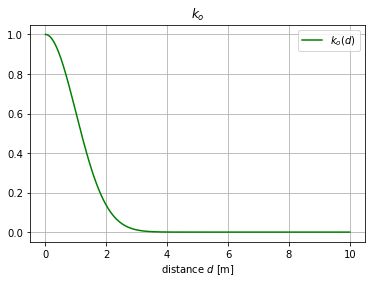

In [38]:
distance = np.linspace(0, 10, 1000)
ko_list = np.zeros(len(distance))

c = 0.5
for k in range(len(distance)):
    ko_list[k] = np.exp(- c*distance[k]**2)

plt.figure()
plt.plot(distance, ko_list, label='$k_o(d)$', color='g')

plt.xlabel('distance $d$ [m]');
plt.legend()
plt.grid()
plt.title('$k_o$');

### Correr a célula abaixo para dar reset à arena!

In [39]:
try:
    reset_arena_obs()
except rospy.ServiceException as e:
    print("Service call failed: %s" + str(e))            

In this way, we can remove the trajectory offset, as shown in the simulations below.

In [40]:
msg = rospy.wait_for_message('/odom0_obs' + team, Odometry, timeout=None)
   
# Dynamics: States=[x] Control=[u] where x_dot=u
initial_state = [msg.pose.pose.position.x, msg.pose.pose.position.y]
initial_control = [0.0, 0.0]

dt = 0.01
sim_time = 1
time = []
ux, uy = [], []
x, y = [], []
xdv, ydv = [], []
kx, ky = 1, 1
K = np.diag([kx,ky])

Ko_init = 0.1*K
xo = np.array([ 1.0, 1.0 ])
radius = 0.5

run = True
if run:
    for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

        # Time
        time.append(t)
        xid = np.array([ 1.5, 2.0 ])
        dot_xid = np.array([ 0.0, 0.0 ])

        # Control
        noise_bias = 0.0
        noise_std_deviation = 0.0
        msg = rospy.wait_for_message('/odom0_obs' + team, Odometry, timeout=None)
        state = [msg.pose.pose.position.x, msg.pose.pose.position.y] + np.random.normal(noise_bias,noise_std_deviation,2)

        c = 5
        distance = np.linalg.norm(state - xo) - radius    
        ko = np.exp(-c*distance**2)
        Ko = ko*Ko_init
        u_control = - K @ ( state - xid ) + (1/distance**2)*Ko @ ( state - xo ) + dot_xid

        # Send actuation commands
        msg_act = Twist()
        msg_act.linear.x = u_control[0]
        msg_act.linear.y = u_control[1]
        pub0_obs.publish(msg_act)

        ux.append(u_control[0])
        uy.append(u_control[1])

        x.append(state[0])
        y.append(state[1])

        xdv.append(xid[0])
        ydv.append(xid[1])
    run = False
    
msg = Twist()
msg.linear.x = 0.0
msg.linear.y = 0.0
pub0.publish(msg)

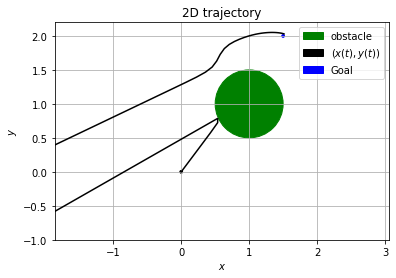

In [41]:
circle = plt.Circle(xo, radius, color='g', label='obstacle')
robot = plt.Circle(initial_state, 0.02, color='k', label='$(x(t),y(t))$')
goal = plt.Circle(xid, 0.02, color='b', label='Goal')

fig, ax = plt.subplots()

ax.axis('equal')
plt.xlim(-1,2.2)
plt.ylim(-1,2.2)
plt.grid()

ax.add_patch(circle);
ax.add_patch(robot);
ax.add_patch(goal);


plt.plot(x, y, color='k')
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.title('2D trajectory');
plt.legend();



**Activity 7.** Go above and try:

1. Other position goals $\xi_d$, and different obstacles positions
2. More than one obstacle